# Разработка модели машинного обучения по данным ассоциации пастбищ "Экоферма"

В IT-компанию, которая выполняет на заказ проекты по машинному обучению, обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма», которая готова предоставить подробные данные о своих коровах.
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. 

**Цель исследования** - разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. 

Чтобы достигнуть цели, нужно создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Ход исследования:**
1. Узнать общую информацию о данных.
2. Выполнить предобработку данных, обработать явные и неявные дубликаты при их наличии, аномальные значения и пропущенные данные.
3. Провести исследовательский анализ данных.
4. Провести корреляционный анализ признаков в датасете.
5. Обучить модель линейной регрессии.
5. Обучить модель логистической регрессии.
6. Сделать вывод.

## Загрузка данных

На первом этапе изучения данных, мы импортируем необходимые библиотеки, которые пригодятся для исследования, и изучим общую информацию о датасетах.

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import math

import numpy as np

import seaborn as sns

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import  accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, precision_score, recall_score, r2_score 

In [1]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep= ';')

NameError: name 'pd' is not defined

In [4]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep= ';')

In [5]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep= ';')

In [6]:
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


In [7]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [8]:
ferma_dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [9]:
ferma_dad.rename(columns={'Имя Папы': 'имя_папы'}, inplace = True)
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [10]:
cow_buy.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [11]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


В датафрейме **ferma_main** 12 столбцов. Согласно документации к данным, файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
* `id` — уникальный идентификатор коровы.
* `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
* `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
* `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
* `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
* `Порода` — порода коровы.
* `Тип пастбища` — ландшафт лугов, на которых паслась корова.
* `порода папы_быка` — порода папы коровы.
* `Жирность,%` — содержание жиров в молоке (в процентах).
* `Белок,%` — содержание белков в молоке (в процентах).
* `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Количество значений совпадает во всех колонках, значит, пропущенных данных нет.
В столбцах 'ЭКЕ', 'СПО', 'Жирность', 'Белок' нужно привести данные к типу float вместо object. 

В датафрейме **ferma_dad** 2 столбца. Согласно документации к данным, файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
* `id` — уникальный идентификатор коровы.
* `Имя Папы` — имя папы коровы.

Количество значений уникального идентификатора коровы не совпадает в этом датасете и предыдущем, значит, в этом датасете не хватает некоторых данных. Название колонки 'Имя Папы' приведено к змеиному регистру.

В датафрейме **cow_buy** 7 столбцов. Согласно документации к данным, файл cow_buy.csv хранит данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
* `Порода` — порода коровы.
* `Тип пастбища` — ландшафт лугов, на которых паслась корова.
* `порода папы_быка` — порода папы коровы.
* `Имя_папы` — имя папы коровы.
* `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
* `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
* `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Количество значений во всех столбцах совпадает.

Кроме того, данные "Текущая_жирность,%", "Текущий_уровень_белок,%" нужно привести к типу float вместо object. 

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать.

**Сделаем вывод по первой части исследования. Названия колонок необходимо приведеcти к единообразию, в данных есть пропущенные значения, на этапе предобработки данных будет необходимо обработать их и привести несколько столбцов к нужному типу.**

##  Предобработка данных

Приведём названия колонок к нижнему регистру.

In [12]:
ferma_main.columns = ferma_main.columns.str.lower()
ferma_dad.columns = ferma_dad.columns.str.lower()
cow_buy.columns = cow_buy.columns.str.lower()

Проверим наличие пропущенных значений.

In [13]:
for columns in ferma_main:
    print(columns)
    print(ferma_main[columns].isna().sum())

id
0
удой, кг
0
эке (энергетическая кормовая единица)
0
сырой протеин, г
0
спо (сахаро-протеиновое соотношение)
0
порода
0
тип пастбища
0
порода папы_быка
0
жирность,%
0
белок,%
0
вкус молока
0
возраст
0


In [14]:
for columns in ferma_dad:
    print(columns)
    print(ferma_dad[columns].isna().sum())

id
0
имя_папы
0


In [15]:
for columns in cow_buy:
    print(columns)
    print(cow_buy[columns].isna().sum())

порода
0
тип пастбища
0
порода папы_быка
0
имя_папы
0
текущая_жирность,%
0
текущий_уровень_белок,%
0
возраст
0


Пропущенных значений не выявлено. 

In [16]:
ferma_main.duplicated().sum()

5

In [17]:
ferma_dad.duplicated().sum()

0

Удалим дубликаты в датасете ferma_main, а в cow_buy не будем их трогать, так как речь идёт о разных коровах, которые обладают одинаковыми характеристиками.

In [18]:
ferma_main = ferma_main.drop_duplicates()
ferma_main.duplicated().sum()

0

Дубликаты удалены. Изменим тип данных в некоторых столбцах. 
- В датафрейме ferma_main приведем к типу float следующие столбцы: 'ЭКЕ', 'СПО', 'Жирность', 'Белок'.
- В датафрейме cow_buy приведем к типу float следующие столбцы: "Текущая_жирность,%", "Текущий_уровень_белок,%".

In [19]:
ferma_main['жирность,%'] = ferma_main['жирность,%'].str.replace(',', '.').astype(float)
ferma_main['жирность,%'].unique()

array([3.58, 3.54, 3.59, 3.4 , 3.73, 3.13, 3.48, 3.55, 3.71, 3.72, 3.61,
       3.22, 3.03, 3.49, 3.31, 3.7 , 3.74, 3.21, 3.11, 3.25, 3.34, 3.24,
       3.53, 3.16, 3.26, 3.57, 3.44, 3.38, 3.18, 3.42, 3.62, 3.75, 3.41,
       3.27, 3.63, 3.12, 3.64, 3.69, 3.37, 3.65, 3.33, 3.28, 3.35, 3.32,
       3.23, 3.15, 3.01, 2.99, 3.39, 3.19])

In [20]:
ferma_main['белок,%'] = ferma_main['белок,%'].str.replace(',', '.').astype(float)
ferma_main['белок,%'].unique()

array([3.076, 3.079, 3.074, 3.075, 3.073, 3.078, 3.077, 3.071, 3.08 ,
       3.072, 3.081, 3.082, 3.07 , 3.069, 3.085])

In [21]:
ferma_main['эке (энергетическая кормовая единица)'] = ferma_main['эке (энергетическая кормовая единица)'].str.replace(',', '.').astype(float)
ferma_main['эке (энергетическая кормовая единица)'].unique()

array([14.2, 12.8, 14. , 12.4, 12.7, 13.2, 14.7, 13.4, 13.7, 16.5, 15.4,
       14.5, 16. , 15.6, 11.5, 15.7, 14.3, 15.5, 14.6, 15.9, 15.2, 14.8,
       16.4, 11.8, 14.4, 16.1, 12.9, 13.8, 13.3, 16.3, 13.9, 14.1, 16.7,
       15.8, 16.2, 12.2, 14.9, 13.6, 12.5, 16.8, 13.5, 15.1, 12.1, 16.6,
       15.3, 13.1, 12.3, 11.9, 12.6, 15. , 13. , 12. , 11.1, 11.7, 10.9])

In [22]:
ferma_main['спо (сахаро-протеиновое соотношение)'] = ferma_main['спо (сахаро-протеиновое соотношение)'].str.replace(',', '.').astype(float)
ferma_main['спо (сахаро-протеиновое соотношение)'].unique()

array([0.89 , 0.885, 0.93 , 0.94 , 0.895, 0.95 , 0.96 , 0.85 , 0.84 ,
       0.86 , 0.88 , 0.9  ])

Проверим данные на аномалии.

удой, кг


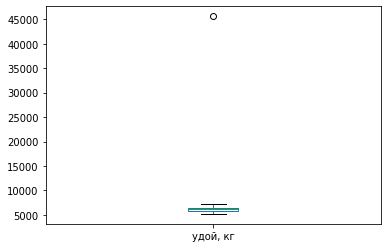

эке (энергетическая кормовая единица)


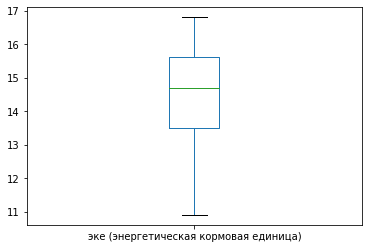

сырой протеин, г


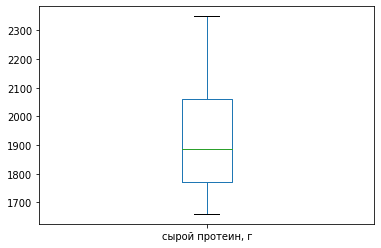

спо (сахаро-протеиновое соотношение)


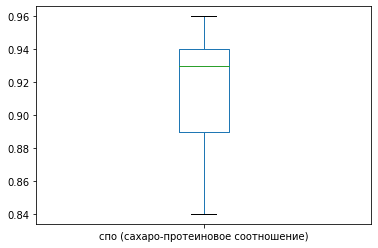

жирность,%


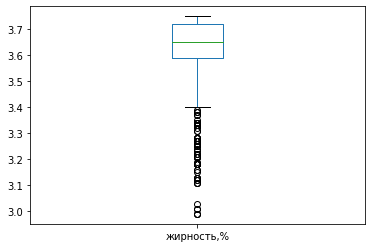

белок,%


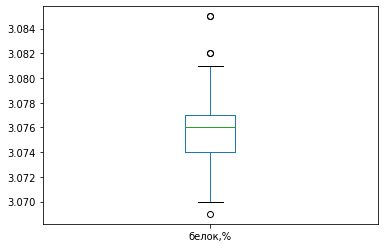

In [23]:
graphics = ferma_main[['удой, кг', 'эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%']]

for columns in graphics:
    print(columns)
    ferma_main[columns].plot(kind='box')
    plt.show()

In [24]:
for columns in ferma_main:
    print(columns)
    print(ferma_main[columns].unique())

id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246

Удалим неявные дубликаты в столбцах "тип пастбища" и "порода папы_быка".

In [25]:
ferma_main['тип пастбища'] = ferma_main['тип пастбища'].replace('Равнинные', 'равнинное')
ferma_main['тип пастбища'] = ferma_main['тип пастбища'].replace('Равнинное', 'равнинное')
ferma_main['порода папы_быка'] = ferma_main['порода папы_быка'].replace('Айдиалл', 'Айдиал')
ferma_main['тип пастбища'] = ferma_main['тип пастбища'].replace('Холмистое', 'холмистое')

Таким образом, в столбце 'удой' было найдено одно аномальное значение - 45616. Эту строку можно удалить в этом датасете и в ferma_dad.

In [26]:
ferma_main[ferma_main['удой, кг'] == 45616]

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [27]:
ferma_main = ferma_main[ferma_main['удой, кг'] != 45616]

In [28]:
ferma_dad = ferma_dad[ferma_dad['id'] != 17]

Заменим тип данных в датасете cow_buy на float.

In [29]:
cow_buy['текущая_жирность,%'] = cow_buy['текущая_жирность,%'].str.replace(',', '.').astype(float)
cow_buy['текущая_жирность,%'].unique()

array([3.58, 3.54, 3.59, 3.4 , 3.64, 3.63, 3.57, 3.73, 3.68, 3.42, 3.77,
       3.34])

In [30]:
cow_buy['текущий_уровень_белок,%'] = cow_buy['текущий_уровень_белок,%'].str.replace(',', '.').astype(float)
cow_buy['текущий_уровень_белок,%'].unique()

array([3.076, 3.081, 3.074, 3.061, 3.053, 3.079, 3.055, 3.073, 3.046,
       3.075, 3.065, 3.069])

текущая_жирность,%


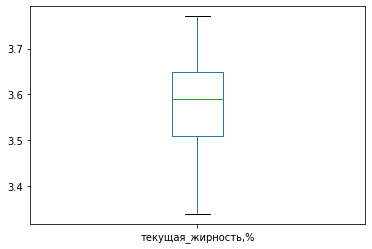

текущий_уровень_белок,%


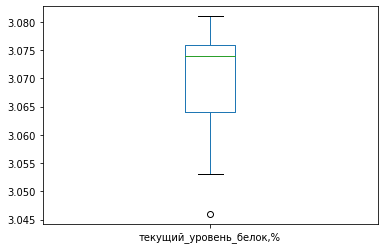

In [31]:
graphics = cow_buy[['текущая_жирность,%', 'текущий_уровень_белок,%']]

for columns in graphics:
    print(columns)
    cow_buy[columns].plot(kind='box')
    plt.show()

In [32]:
for columns in cow_buy:
    print(columns)
    print(cow_buy[columns].unique())

порода
['Вис Бик Айдиал' 'РефлешнСоверинг']
тип пастбища
['холмистое' 'равнинное']
порода папы_быка
['Айдиал' 'Соверин']
имя_папы
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
текущая_жирность,%
[3.58 3.54 3.59 3.4  3.64 3.63 3.57 3.73 3.68 3.42 3.77 3.34]
текущий_уровень_белок,%
[3.076 3.081 3.074 3.061 3.053 3.079 3.055 3.073 3.046 3.075 3.065 3.069]
возраст
['более_2_лет' 'менее_2_лет']


В датасете cow_buy выбросы не обнаружены.

**Таким образом, сделаем следующий вывод:** на этом этапе исследования мы провели предобработку данных, а именно проверили данные на наличие пропущенных значений, удалили дубликаты, изменили тип некоторых данных, выявили аномальные значения и привели названия столбцов к нижнему регистру.

## Исследовательский анализ данных

На этом этапе будет выполнен статистический анализ всех признаков. Мы построим графики для каждого признака.

#### Датасет ferma_main

удой, кг
count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, кг, dtype: float64


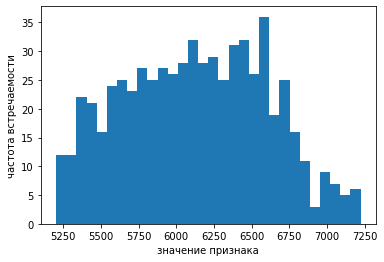

эке (энергетическая кормовая единица)
count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке (энергетическая кормовая единица), dtype: float64


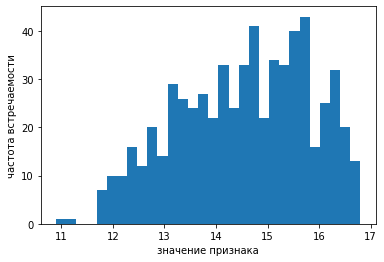

сырой протеин, г
count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой протеин, г, dtype: float64


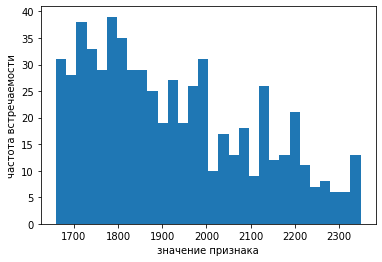

спо (сахаро-протеиновое соотношение)
count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо (сахаро-протеиновое соотношение), dtype: float64


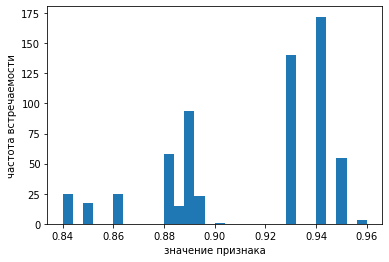

жирность,%
count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность,%, dtype: float64


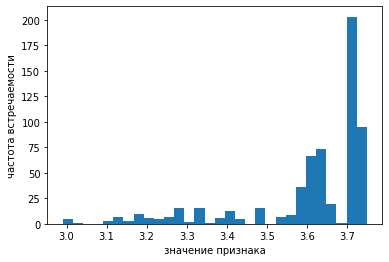

белок,%
count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок,%, dtype: float64


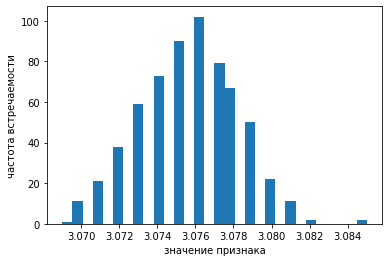

In [33]:
columns = ['удой, кг', 'эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%']
for column in columns:
    print(column)
    print(ferma_main[column].describe())
    ferma_main[column].plot(kind='hist', bins=30)
    plt.xlabel('значение признака')
    plt.ylabel('частота встречаемости')
    plt.show()

Согласно построенным по количественным признакам датасета ferma_main гистограммам:
- удой: медианное значение (6133 кг) приблизительно равно среднему (6126 кг). Выбросы удалены заранее, поэтому максимальное значение - 7222 кг, а минимальное - 5204 кг. 
- эке: медианное значение (14.7) приблизительно равно среднему (14.5). Выбросов нет, минимальное значение равно 10.9, а максимальное - 16.8.
- сырой протеин: медианное значение (1888 г) находится от среднего не очень далеко(1924 г). Выбросов нет, минимальное значение - 1660 г, максимальное - 2349 г. 
- спо: медианное значение (0.93) приблизительно равно среднему (0.91). Выбросов нет, минимальное значение - 0.84, максимальное - 0.96.
- жирность: медианное значение - 3.65%, среднее - 3.6%, они примерно равны. Выбросов нет: минимальное значение - 2.99%, максимальное - 3.75%. 
- белок: медианное значение - 3.08%, среднее - 3.08%. Выбросов нет, минимальное значение - 3.07%, максимальное - 3.09%.

Построим графики по категориальным признакам датасета ferma_main: 

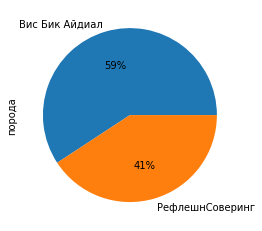

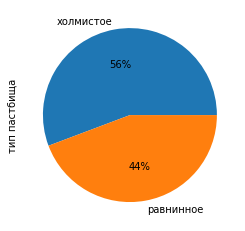

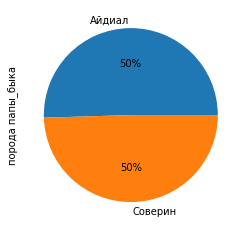

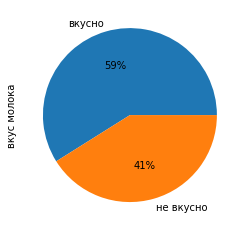

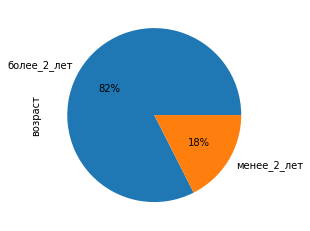

In [34]:
columns = ['порода', 'тип пастбища', 'порода папы_быка', 'вкус молока', 'возраст']
for column in columns:
    ferma_main[column].value_counts().plot(kind='pie', autopct = '%1.0f%%')
    plt.show()

Согласно полученным данным: 
- порода: преобладает Вис Бик Айдиал над РефлешнСоверинг в процентном соотношении 59% к 41%.
- тип пастбища: были замечены неявные дубликаты (Равнинное и Равнинные), затем значение Равнинные перезаписано на Равнинное. Холмистое пастбище преобладает над равнинным в соотношении 56% к 44%.
- порода папы быка: замечены неявные дубликаты (Айдиал и Айдиалл), затем значение Айдиал перезаписано на Айдиалл. Порода Соверин и Айдиал распределены пополам.
- вкус молока: у большинства коров молоко вкусное. В процентном соотношении 59% к 41%.
- возраст: преобладают коровы возрастом более 2 лет в процентном соотношении 82% к 18%.

#### Датасет ferma_dad

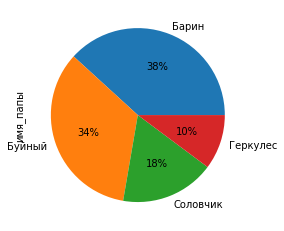

In [35]:
ferma_dad['имя_папы'].value_counts().plot(kind='pie', autopct='%1.0f%%');

Согласно полученным данным: 
- Чаще всего папой был Барин(38%), затем Буйный(34%), Соловчик(17%) и Геркулес(10%).

#### Датасет cow_buy

       текущая_жирность,%  текущий_уровень_белок,%
count           20.000000                20.000000
mean             3.577500                 3.069500
std              0.126818                 0.010339
min              3.340000                 3.046000
25%              3.510000                 3.064000
50%              3.590000                 3.074000
75%              3.650000                 3.076000
max              3.770000                 3.081000


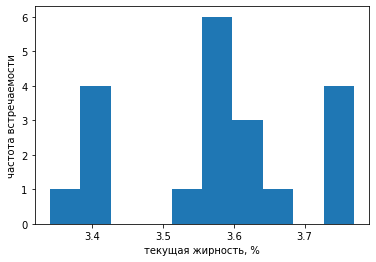

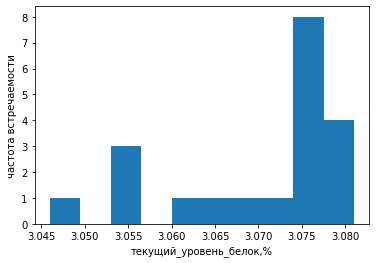

In [36]:
print(cow_buy[['текущая_жирность,%', 'текущий_уровень_белок,%']].describe())
cow_buy['текущая_жирность,%'].plot(kind='hist', bins=10)
plt.xlabel('текущая жирность, %')
plt.ylabel('частота встречаемости')
plt.show()
    
cow_buy['текущий_уровень_белок,%'].plot(kind='hist', bins=10)
plt.xlabel('текущий_уровень_белок,%')
plt.ylabel('частота встречаемости')
plt.show()

Согласно графикам, построенным по количественным данным:
- текущая жирность: медианное значение (3.59%) примерно равно среднему (3.58%). Максимальное значение - 3.77% и минимальное - 3.34%.
- текущий уровень белка: медианное значение (3.07%) примерно равно среднему (3.07%). Максимальное значение - 3.08% и минимальное - 3.05%.

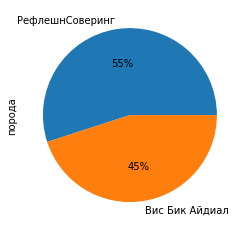

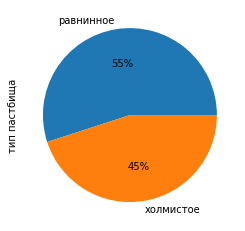

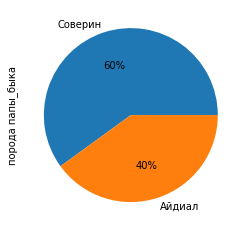

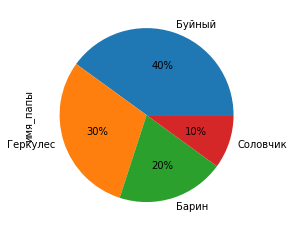

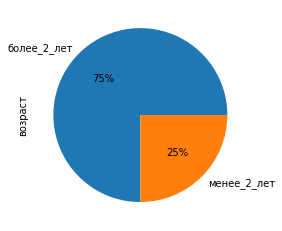

In [37]:
columns = ['порода', 'тип пастбища', 'порода папы_быка', 'имя_папы', 'возраст']
for column in columns:
    cow_buy[column].value_counts().plot(kind='pie', autopct = '%1.0f%%')
    plt.show()

Согласно полученным данным: 
- порода: Вис Бик Айдиал и РефлешнСоверинг распределены в процентном соотношении пополам.
- тип пастбища: холмистое и равнинное распределены в процентном соотношении пополам.
- порода папы быка: преобладает порода Соверин над Айдиал в процентном соотношении 62% к 38%.
- имя папы: чаще всего папой является бык по имени Буйный(44%), затем Геркулес(31%), 3 и 4 место делят Барин и Соловчик (по 12%).
- возраст: преобладают коровы возрастом более 2 лет в процентном соотношении 69% к 31%.

**Таким образом, на данном этапе исследования были построены графики по количественным и категориальным признакам трёх датасетов, изученная информация о них, выбросов не выявлено.**

## Корреляционный анализ

На данном этапе исследования планируется изучить взаимосвязь между признаками: для этого рассчитаем коэффициенты корреляции между всеми признаками.

In [38]:
columns_corr = ferma_main.drop('id', axis=1)
columns_corr.corr()

,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%"
"удой, кг",1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
эке (энергетическая кормовая единица),0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
"сырой протеин, г",0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
спо (сахаро-протеиновое соотношение),0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
"жирность,%",0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
"белок,%",0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


Заметна корреляция между следующими признаками: 
- удой и эке (0.77). Высокая положительная корреляция.
- удой и сырой протеин (0.45). Умеренная положительная корреляция.
- удой и спо (0.81). Высокая положительная корреляция.
- удой и жирность (0.6). Заметная положительная корреляция.
- эке и сырой протеин (0.39). Умеренная положительная корреляция.
- эке и спо (0.75). Высокая положительная корреляция.
- эке и жирность (0.64). Заметная положительная корреляция.
- сырой протеин и спо (0.45). Умеренная положительная корреляция.
- сырой протеин и жирность (0.36). Умеренная положительная корреляция.
- спо и жирность (0.63). Заметная положительная корреляция.
- белок и сырой протеин (0.23). Слабая положительная корреляция.

Взаимосвязь удоя и количественных признаков с учетом породы


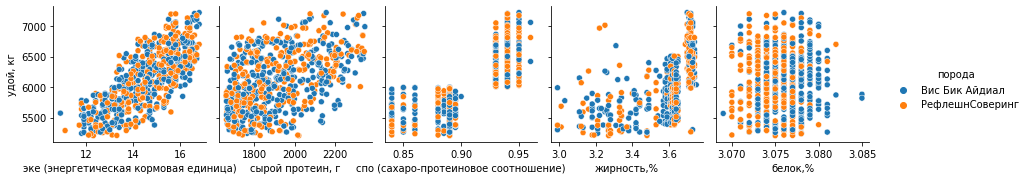

In [39]:
print('Взаимосвязь удоя и количественных признаков с учетом породы')
sns.pairplot(ferma_main, x_vars=['эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%'], y_vars='удой, кг', hue='порода');

Взаимосвязь удоя и количественных признаков с учетом типа пастбища


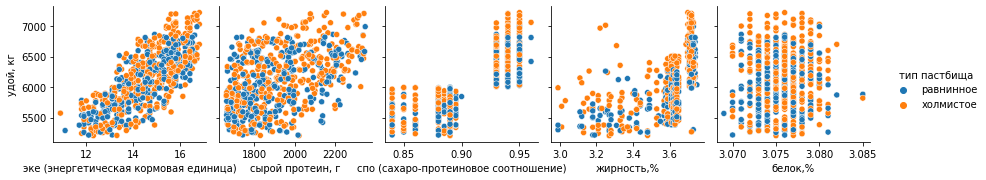

In [40]:
print('Взаимосвязь удоя и количественных признаков с учетом типа пастбища')
sns.pairplot(ferma_main, x_vars=['эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%'], y_vars='удой, кг', hue='тип пастбища');

Взаимосвязь удоя и количественных признаков с учетом породы папы_быка


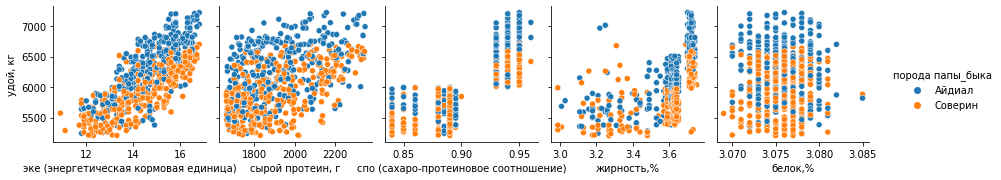

In [41]:
print('Взаимосвязь удоя и количественных признаков с учетом породы папы_быка')
sns.pairplot(ferma_main, x_vars=['эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%'], y_vars='удой, кг', hue='порода папы_быка');

Взаимосвязь удоя и количественных признаков с учетом вкуса молока


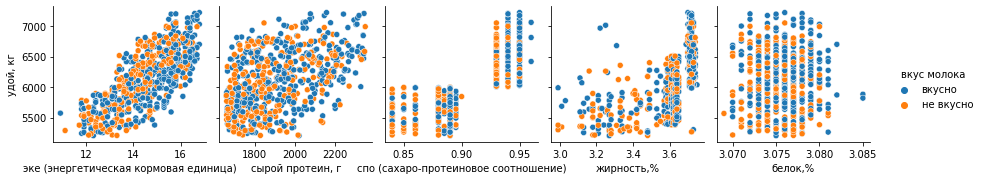

In [42]:
print('Взаимосвязь удоя и количественных признаков с учетом вкуса молока')
sns.pairplot(ferma_main, x_vars=['эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%'], y_vars='удой, кг', hue='вкус молока');

Взаимосвязь удоя и количественных признаков с учетом возраста


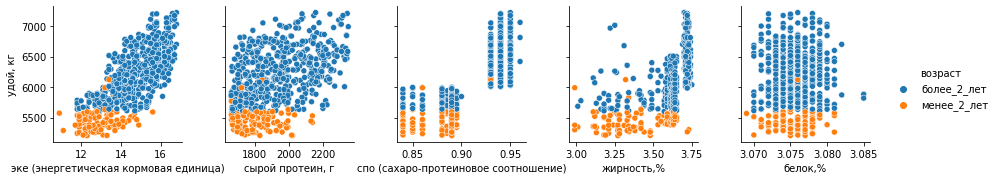

In [43]:
print('Взаимосвязь удоя и количественных признаков с учетом возраста')
sns.pairplot(ferma_main, x_vars=['эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%'], y_vars='удой, кг', hue='возраст');

In [44]:
ferma_merge = ferma_main.merge(ferma_dad, on='id', how='left')

Объединим датасеты ferma_main и ferma_dad, чтобы можно было учесть этот категориальный признак в анализе данных.

Взаимосвязь удоя и количественных признаков с учетом имени папы


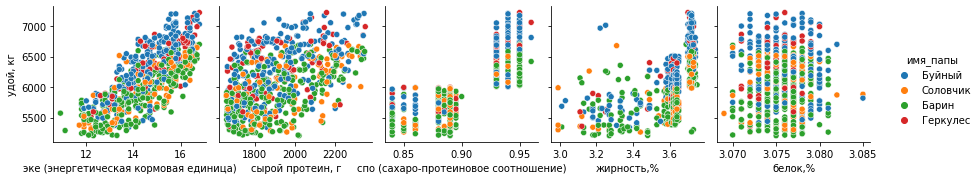

In [45]:
print('Взаимосвязь удоя и количественных признаков с учетом имени папы')
sns.pairplot(ferma_merge, x_vars=['эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%'], y_vars='удой, кг', hue='имя_папы');

Между удоем и входными признаками прослеживается нелинейная зависимость.

In [46]:
cow_buy.corr()

,"текущая_жирность,%","текущий_уровень_белок,%"
"текущая_жирность,%",1.000000,-0.262722
"текущий_уровень_белок,%",-0.262722,1.000000


Между текущей жирностью и текущим уровнем белка слабая отрицательная корреляция(-0.295)

**Таким образом, корреляционный анализ показал, что:**
- между целевым признаком и входным прослеживается нелинейная взаимосвязь.
- чтобы это учесть, необходимо ввести в модуль дополнительные признаки.
- мультиколлинеарность прослеживается только между входными признаками эке и спо (0.75), заметна высокая положительная корреляция.

## Обучение модели линейной регрессии

В этом этапе исследования нам предстоит обучить три модели простой линейной регрессии.

**1. Подготовка данных датасета ferma_main.csv и обучение первой модели LinearRegression.**

В качестве целового признака будет использован удой, а в качестве входных - порода, тип пастбища, порода папы быка, возраст, так как именно эти критерии влияют на количество удоя, а остальные признаки являются вытекающими из удоя, например, вкус молока, белок итд. 

In [47]:
ferma_copy1 = ferma_merge.copy()
X = ferma_copy1.drop('удой, кг', axis=1)
y = ferma_copy1['удой, кг']

In [48]:
RANDOM_STATE = 42

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=RANDOM_STATE)

In [50]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст']
num_col_names = ['эке (энергетическая кормовая единица)', 'спо (сахаро-протеиновое соотношение)', 'сырой протеин, г']

In [51]:
encoder = OneHotEncoder(drop='first', sparse=False)

In [52]:
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [53]:
X_test_ohe = encoder.transform(X_test[cat_col_names])

In [54]:
encoder_col_names = encoder.get_feature_names_out()

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [56]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [57]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [58]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [59]:
model_lr  = LinearRegression()

In [60]:
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
predictions[:1]

array([6031.5380807])

Определив входные и целевой признаки, разбив данные на тестовую и тренировочную выборки, закодировав категориальные признаки,  стандартизировав количественные признаки и обучив модель линейной регрессии на подготовленных данных, проведём оценку качества модели на тестовой выборке.

In [61]:
r2 = r2_score(y_test, predictions)
r2

0.7844078173416966

Значение r2 довольно близко к единице, что говорит о высоком качестве точности работы модели. Проанализируем остатки с помощью графиков.

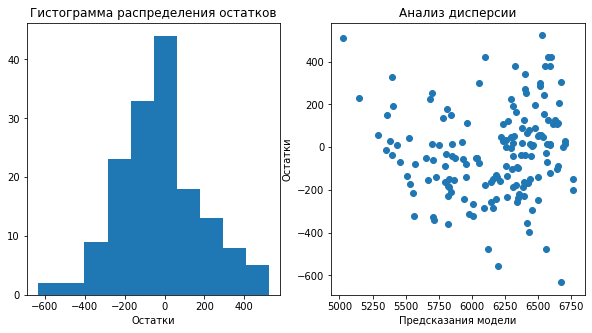

In [62]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Гистограмма распределения остатков показывает нормальное распределение с небольшим смещением вправо. Получается, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения, но чаще отрицательные. Такая модель работает качественно.

Анализ дисперсии выявил увеличение разброса ошибки при предсказании большого количества удоя. Мало коров с большим количеством удоя, это значит, что модель не научилась еще хорошо предсказывать их удой.

**Таким образом, на данном этапе исследования были сделаны следующие выводы:**
- при построении первой модели линейной регрессии метрика r2 равна 0.78, что говорит о 78% точности модели. 
- Гистограмма распределения остатков показывает нормальное распределение со смещением вправо.
- Анализ дисперсии выявил увеличение разброса ошибки при предсказании большого количества удоя. 
- чтобы улучшить модель, отредактируем некоторые признаки.

**2. Подготовка данных с учётом связи входных признаков с целевым и обучение на них второй модели LinearRegression.**

На диаграммах рассеяния можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключим нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
- СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.
- ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [63]:
ferma_merge['спо_бинарный'] = (ferma_merge['спо (сахаро-протеиновое соотношение)'] > 0.91).astype(int)

In [64]:
ferma_merge['спо_бинарный']

0      0
1      0
2      0
3      0
4      0
      ..
623    1
624    0
625    0
626    0
627    1
Name: спо_бинарный, Length: 628, dtype: int64

Таким образом, мы создали бинарный категориальный признак: если спо больше 0.91 - значение равно 1, меньше - 0.
Следующим шагом возведём в квадрат признак эке.

In [65]:
ferma_merge['эке_квадрат'] = ferma_merge['эке (энергетическая кормовая единица)'] ** 2

In [66]:
ferma_merge = ferma_merge.drop(['эке (энергетическая кормовая единица)', 'спо (сахаро-протеиновое соотношение)'], axis=1)

Создадим вторую модель.

In [67]:
ferma_copy2 = ferma_merge.copy()
X = ferma_copy2.drop('удой, кг', axis=1)
y = ferma_copy2['удой, кг']

In [68]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test2 = train_test_split(X,y, random_state=RANDOM_STATE)

In [69]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст', 'спо_бинарный']
num_col_names = ['эке_квадрат', 'сырой протеин, г']

In [70]:
encoder2 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder2.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder2.transform(X_test[cat_col_names])
encoder_col_names = encoder2.get_feature_names_out()

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train[num_col_names])
X_test_scaled = scaler2.transform(X_test[num_col_names])

In [72]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [73]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [74]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [75]:
model_lr2  = LinearRegression()
model_lr2.fit(X_train, y_train)
predictions_2 = model_lr2.predict(X_test)
predictions_2[:1]

array([5944.27814173])

Определив входные и целевой признаки, разбив данные на тестовую и тренировочную выборки, закодировав категориальные признаки, стандартизировав количественные признаки и обучив модель линейной регрессии на подготовленных данных, проведём оценку качества модели на тестовой выборке.

In [76]:
r2 = r2_score(y_test2, predictions_2)
r2

0.8180879926867501

Значение r2 стало еще ближе к единице (0.817), что говорит о более высоком качестве точности работы модели. Проанализируем остатки с помощью графиков.

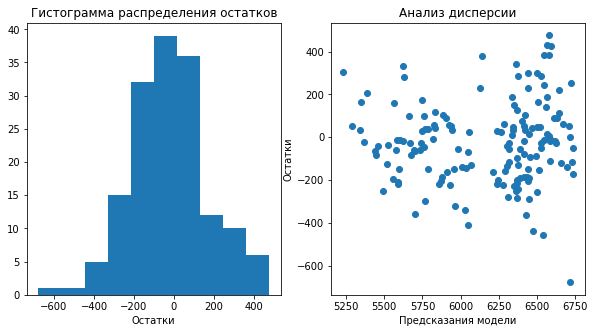

In [77]:
residuals = y_test2 - predictions_2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_2, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Гистограмма распределения остатков так же показывает нормальное распределение со смещением вправо.
Анализ дисперсии стал немного больше похож на нормальную дисперсию остатков, но всё же еще виднеется "рупор".

**Таким образом, на данном этапе исследования были сделаны следующие выводы:**

- при построении второй модели линейной регрессии метрика r2 равна 0.81, что говорит о 81% точности модели.
- Гистограмма распределения остатков показывает нормальное распределение со смещением вправо.
- Анализ дисперсии выявил увеличение разброса ошибки при предсказании большого количества удоя. Чтобы улучшить модель, добавим новый признак.

**3. Обучение третьей модели линейной регрессии.**

Добавим в данные новый признак Имя папы.

In [78]:
ferma_copy = ferma_merge.copy()
X = ferma_copy.drop('удой, кг', axis=1)
y = ferma_copy['удой, кг']

In [79]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test3 = train_test_split(X,y, random_state=RANDOM_STATE)

In [80]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст', 'имя_папы', 'спо_бинарный']
num_col_names = ['эке_квадрат', 'сырой протеин, г']

In [81]:
encoder3 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder3.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder3.transform(X_test[cat_col_names])
encoder_col_names = encoder3.get_feature_names_out()

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
scaler3 = StandardScaler()
X_train_scaled = scaler3.fit_transform(X_train[num_col_names])
X_test_scaled = scaler3.transform(X_test[num_col_names])

In [83]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [84]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [85]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [86]:
model_lr3  = LinearRegression()
model_lr3.fit(X_train, y_train)
predictions_3 = model_lr3.predict(X_test)
predictions_3[:1]

array([6013.24842729])

Определив входные и целевой признаки, разбив данные на тестовую и тренировочную выборки, закодировав категориальные признаки, стандартизировав количественные признаки и обучив модель линейной регрессии на подготовленных данных, проведём оценку качества модели на тестовой выборке.

In [87]:
r2 = r2_score(y_test3, predictions_3)
r2

0.8247542745210408

Значение r2 стало еще ближе к единице (0.82), что говорит о более высоком качестве точности работы модели. Проанализируем остатки с помощью графиков.

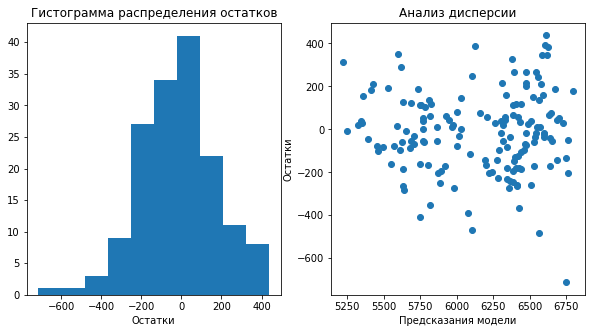

In [88]:
residuals = y_test - predictions_3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_3, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Гистограмма распределения остатков нормально распределен и немного смещен вправо. Следовательно, модель занижает прогнозные значения.

Анализ дисперсии не изменился, виднеется "рупор".

**Таким образом, на данном этапе исследования были сделаны следующие выводы:**

- при построении второй модели линейной регрессии метрика r2 равна 0.82, что говорит о 82% точности модели.
- Гистограмма распределения остатков показывает нормальное распределение. Это говорит о том, что среднее значение остатков модели равно 0.
- Анализ дисперсии не изменился.

**Вывод:**
- r2 выше всего у 3 модели, он равен 0.82. 
- анализ остатков показал, что график распределения остатков лучше у 2 модели, так как у 3 модели он немного смещен вправо. 

Оценим качество моделей по трём метрикам: MSE, MAE, RMSE.

In [89]:
mse1 = mean_squared_error(y_test, predictions)
mse1

43887.01500966052

In [90]:
mse2 = mean_squared_error(y_test2, predictions_2)
mse2

37030.91131113695

In [91]:
mse3 = mean_squared_error(y_test3, predictions_3)
mse3

35673.88988618191

Таким образом, среднеквадратичная ошибка меньше всего у 3 модели (35674 кг в квадрате).

In [92]:
rmse1 = mean_squared_error(y_test, predictions, squared=False) 
rmse1

209.49227911706083

In [93]:
rmse2 = mean_squared_error(y_test2, predictions_2, squared=False) 
rmse2

192.43417396901452

In [94]:
rmse3 = mean_squared_error(y_test3, predictions_3, squared=False) 
rmse3

188.8753289505591

Таким образом, корень среднеквадратичной ошибки меньше всего у 3 модели, в среднем модель ошибается на 189 рублей.

In [95]:
mae1 = mean_absolute_error(y_test, predictions)
mae1

164.2419446347493

In [96]:
mae2 = mean_absolute_error(y_test2, predictions_2)
mae2

149.03965222364602

In [97]:
mae3 = mean_absolute_error(y_test3, predictions_3)
mae3

146.1630244536231

Таким образом, средняя абсолютная ошибка меньше всего у 3 модели (146 целевых единиц).

Следовательно, третья модель является лучшей по оценкам метрик. Вычислим доверительный интервал прогноза лучшей модели:

In [98]:
np.quantile(predictions, 0.025)

5360.551304534663

In [99]:
np.quantile(predictions, 0.975)

6686.302739512269

Следовательно, доверительным интервалом можно счить прогноз по удою в рамках от 5372 кг до 6688 кг. Это значит, что эти значения могут быть получены в 95% случаев.

**С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить.**

Для этого добавим в датасет cow_buy новые колонки по спо, эке и сырому протеину, предварительно увеличив их значения на 5%.

In [100]:
cow_buy['спо (сахаро-протеиновое соотношение)'] = ferma_main['спо (сахаро-протеиновое соотношение)'].mean() * 1.05
cow_buy['эке (энергетическая кормовая единица)'] = ferma_main['эке (энергетическая кормовая единица)'].mean() * 1.05
cow_buy['сырой протеин, г'] = ferma_main['сырой протеин, г'].mean() * 1.05

In [101]:
cow_buy['спо_бинарный'] = (cow_buy['спо (сахаро-протеиновое соотношение)'] > 0.91).astype(int)
cow_buy['эке_квадрат'] = cow_buy['эке (энергетическая кормовая единица)'] **2

In [102]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст', 'имя_папы', 'спо_бинарный']
num_col_names = ['эке_квадрат', 'сырой протеин, г']

In [103]:
X_cow_ohe = encoder3.transform(cow_buy[cat_col_names])

In [104]:
X_cow_scaled = scaler3.transform(cow_buy[num_col_names])
encoder_col_names = encoder3.get_feature_names_out()

In [105]:
X_cow_final = pd.DataFrame(X_cow_ohe, columns=encoder_col_names)
X_cow_finall = pd.DataFrame(X_cow_scaled, columns=num_col_names)
X_final = pd.concat([X_cow_final, X_cow_finall], axis=1)

In [106]:
predictions = model_lr3.predict(X_final)
cow_buy['прогноз_удой'] = predictions
predictions

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

Таким образом, все коровы дают больше 6000 кг молока, значит, все они подходят фермеру. Чтобы выбрать лучших, расположим их по списку.

In [107]:
cow_buy.sort_values(by='прогноз_удой', ascending=False)

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,спо (сахаро-протеиновое соотношение),эке (энергетическая кормовая единица),"сырой протеин, г",спо_бинарный,эке_квадрат,прогноз_удой
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6617.928926
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6609.919297
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6609.919297
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6609.919297
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6593.089377
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6593.089377
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6571.259737
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6571.259737
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6542.146066
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6542.146066


**Итак, в этом этапе исследования нами были обучены 3 модели, добавлены новые признаки в них и отредактированы. По оценке качества победила третья модель, так как её метрики были лучше других. Нами был сделан прогноз, в ходе которого установлено, что все коровы дают больше 6000 кг молока, а значит, все они подходят фермеру. Топ-5 коров расположены под номерами 0, 12, 6, 3, 15.**

## Обучение модели логистической регрессии

В этом этапе исследования планируется обучить модель логистической регрессии на основе датасета ferma_main, проанализировать и с помощью обученной модели спрогнозировать вкус молока коров, которых фермер хочет купить.
В качестве целевого признака будет использован вкус молока, а в качестве входных - жирность молока, уровень белка, удой, спо, эке, сырой протеин, возраст коровы, порода, тип пастбища, имя папы, порода папы. 

In [108]:
ferma_merge['вкус_бинарный'] = (ferma_merge['вкус молока'] == 'вкусно').astype(int)
cow_buy.rename(columns={'текущий_уровень_белок,%': 'белок,%', 'текущая_жирность,%': 'жирность,%'}, inplace = True)

In [109]:
X = ferma_merge.drop('вкус_бинарный', axis=1)
y = ferma_merge['вкус_бинарный']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [111]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст', 'имя_папы', 'спо_бинарный']
num_col_names = ['сырой протеин, г', 'эке_квадрат', 'жирность,%', 'белок,%']

In [112]:
encoder  = OneHotEncoder(sparse=False, drop='first')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [114]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [115]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0])

Разбив данные на тренировочную и тестовую выборки, создав из вкуса молока бинарный признак (0 и 1: 1 - вкусно, 0 - не вкусно), отмасштабировав их, закодировав и обучив модель, рассчитаем метрики качества accuracy, recall, precision.

In [116]:
acc = accuracy_score(y_test, y_pred)
acc

0.6305732484076433

Точность модели, согласно метрике accuracy, равна 63%, не очень высокий результат.

In [117]:
recall = recall_score(y_pred, y_test)
recall

0.6229508196721312

Эта метрика равна 62%, значит, модель часто ошибается, так как присваивает класс 1 далеко не всем объектам этого класса.

In [118]:
precision = precision_score(y_pred, y_test)
precision

0.8636363636363636

Метрика precision равна 86%, это значит, что модель иногда выставляет класс 1 объектам класса 0.

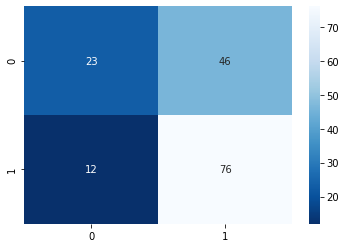

In [119]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Согласно матрице ошибок, модель совершает 46 ошибок False Positive и 12 ошибок Flase Negative. Попробуем установить несколько порогов и выбрать наиболее подходящий.

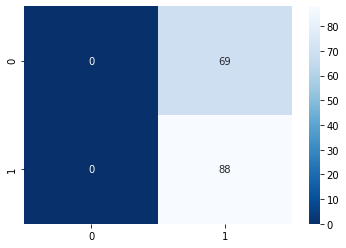

In [120]:
threshold = 0.2
y_pred_prob = clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Согласно матрице ошибок, при пороге 0.2 модель совершает 69 ошибок False Positive.

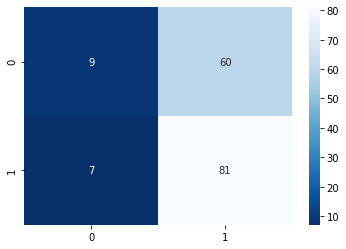

In [121]:
threshold = 0.4
y_pred_prob = clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Согласно матрице ошибок, при пороге 0.4 модель совершает 60 ошибок False Positive.

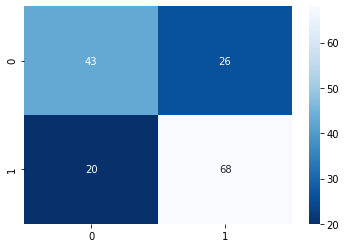

In [122]:
threshold = 0.6
y_pred_prob = clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Согласно матрице ошибок, при пороге 0.6 модель совершает 26 ошибок False Positive.

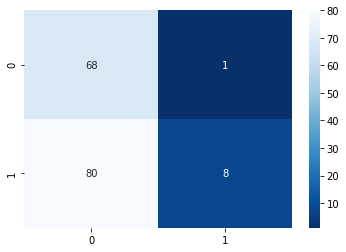

In [123]:
threshold = 0.8
y_pred_prob = clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Согласно матрице ошибок, при пороге 0.8 модель совершает 1 ошибку False Positive.

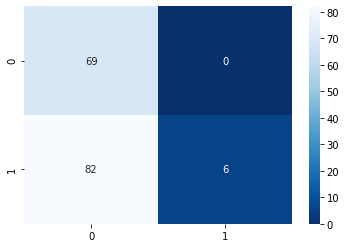

In [124]:
threshold = 0.81
y_pred_prob = clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Согласно матрице ошибок, при пороге 0.81 модель совершает 0 ошибку False Positive.

Оставим в качестве предела значение порога классификации - 0.81, так критичная ошибка сводится к нулю.

Критичнее всего при покупке коров ошибка первого рода, так как страшнее, когда модель ставит 1 вместо 0, то есть присваивает невкусному молоку значение вкусного. Поэтому стоит обратить особое внимание на метрику precision, которая оценивает точность, с которой модель присваивает объектам класс 1. Модель recall, безусловно, важна, так как показывает, везде ли проставлен класс 1, то есть все ли вкусное молоко занесено в этот класс. Но так как более значительным является не получить 1 вместо 0, значит, большее внимание обратим на метрику precision.

In [125]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст', 'имя_папы', 'спо_бинарный']
num_col_names = ['сырой протеин, г', 'эке_квадрат', 'жирность,%', 'белок,%']

In [126]:
X_cow_ohe = encoder.transform(cow_buy[cat_col_names])
X_cow_scaled = scaler.transform(cow_buy[num_col_names])
encoder_col_names = encoder.get_feature_names_out()

In [127]:
X_cow_final = pd.DataFrame(X_cow_ohe, columns=encoder_col_names)
X_cow_finall = pd.DataFrame(X_cow_scaled, columns=num_col_names)
X_final = pd.concat([X_cow_final, X_cow_finall], axis=1)

In [128]:
threshold = 0.7
y_proba = clf.predict_proba(X_final)[:,1]
predictions = (y_proba > threshold).astype(int)
predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Идеальный порог в 0.81 пришлось снизить до 0.7, так как 

In [129]:
cow_buy['прогноз_вкуса'] = predictions
cow_buy.head(20)

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,спо (сахаро-протеиновое соотношение),эке (энергетическая кормовая единица),"сырой протеин, г",спо_бинарный,эке_квадрат,прогноз_удой,прогноз_вкуса
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6609.919297,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6378.711028,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6283.999775,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6593.089377,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6542.146066,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6425.380218,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6609.919297,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6571.259737,0
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6283.999775,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,15.276162,2019.947532,1,233.361138,6400.540668,1


**Таким образом, с помощью модели логистической регрессии было предсказано, что вкусное молоко будут давать коровы под номерами 0, 6 и 9.
Обобщая спрогнозированные данные, отметим, что к покупке рекомендуются коровы под индексми 0 и 6, так как у них максимальный удой и они дают вкусное молоко.**

## Итоговые выводы

Таким образом, наше исследование было проведено в несколько этапов:
- ознакомление с данными
- предобработка данных (на этом этапе были удалены неявные дубликаты, проверены данные на пропущенные значения, выявлены аномалии)

- исследовательский анализ данных показал, что:
- порода: Вис Бик Айдиал и РефлешнСоверинг распределены в процентном соотношении пополам.
- тип пастбища: холмистое и равнинное распределены в процентном соотношении пополам.
- порода папы быка: преобладает порода Соверин над Айдиал в процентном соотношении 62% к 38%.
- имя папы: чаще всего папой является бык по имени Буйный(44%), затем Геркулес(31%), 3 и 4 место делят Барин и Соловчик (по 12%).
- возраст: преобладают коровы возрастом более 2 лет в процентном соотношении 69% к 31%.
- корреляционный анализ показал, что:
- между целевым признаком и входным прослеживается нелинейная взаимосвязь.
- мультиколлинеарность прослеживается только между входными признаками эке и спо (0.75), заметна высокая положительная корреляция.
- с помощью модели линейной регрессии было предсказано, что все коровы дают больше 6000 кг молока, а значит, все они подходят фермеру. Топ-5 коров расположены под номерами 0, 12, 6, 3, 15.
- с помощью модели логистической регрессии было предсказано, что вкусное молоко будут давать коровы под номерами 0, 6 и 9. 
- следовательно, к покупке рекомендуются коровы под индексами 0 и 6, они дают вкусное молоко и их удой превышает 6000 кг. 

Чтобы улучшить качество регрессионной модели, мы использовали следующие методы: убирали нелинейность признаков, добавляли новые признаки. Возможно, модель можно улучшить, если будут добавлены еще новые признаки, которые влияют на удой и на вкус молока. При анализе работы моделей классификации, в том числе логистической, нами были использованы такие метрики, как r2, mse, rmse, mae, recall, accuracy, precission. Таким образом, в качестве рекомендации фермеру предлагается расширить данные о коровах, которые влияют на удой и вкус молока, постараться найти новые признаки.